<a href="https://colab.research.google.com/github/nafi-rahman/ML-AI/blob/main/MLforEveryone%7CClassification%7C(MAGIC_DATASET).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning for Everybody – Full Course by Kylie Ying  


https://youtu.be/i_LwzRVP7bg?list=PLWKjhJtqVAblStefaz_YOVpDWqcRScc2s

### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Source: Data Source :http://data.seoul.go.kr/
SOUTH KOREA PUBLIC HOLIDAYS. URL: publicholidays.go.kr

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"] = (df["class"] == "g").astype(int)

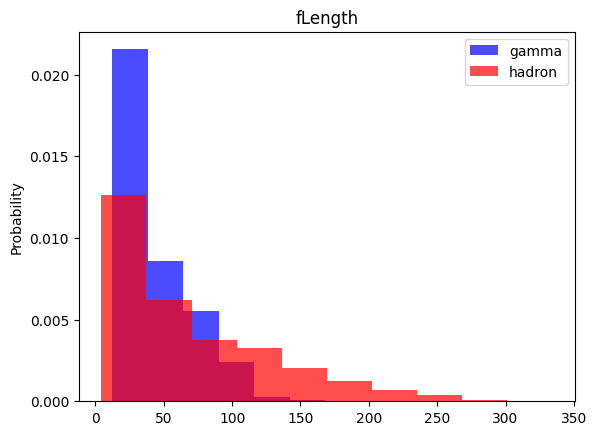

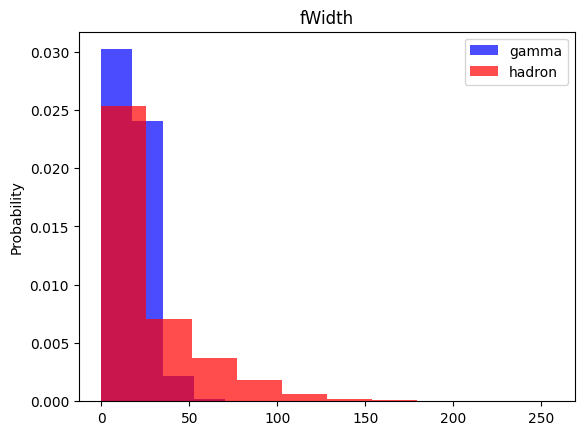

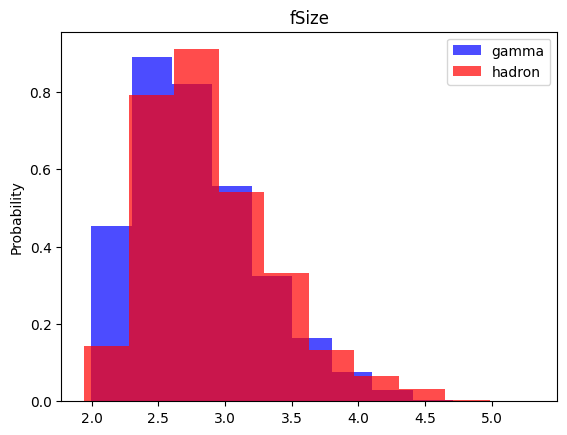

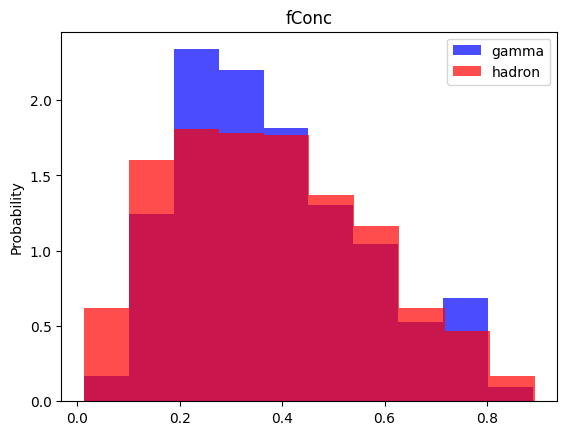

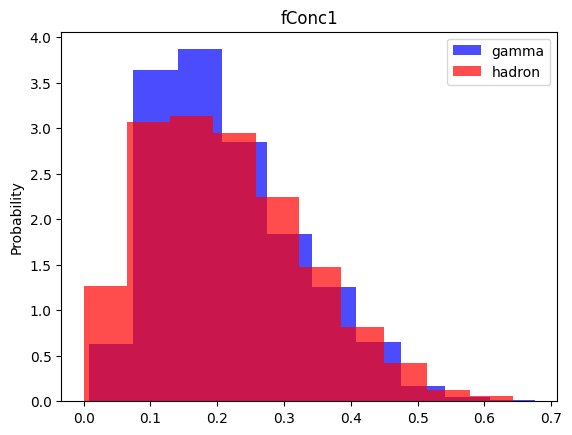

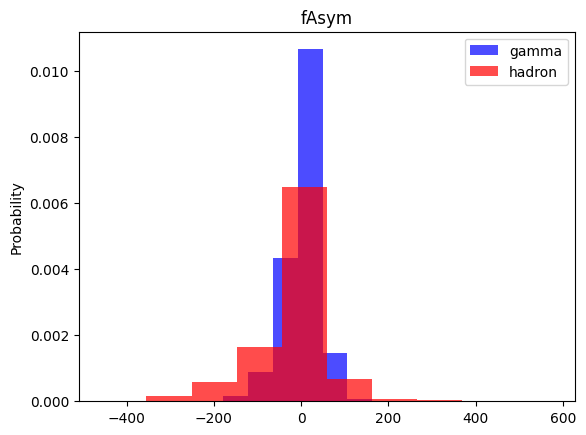

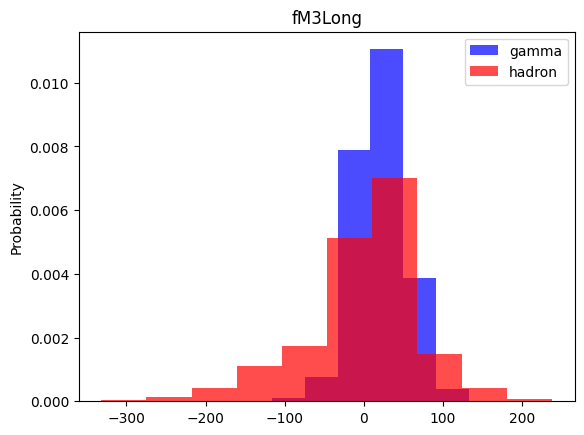

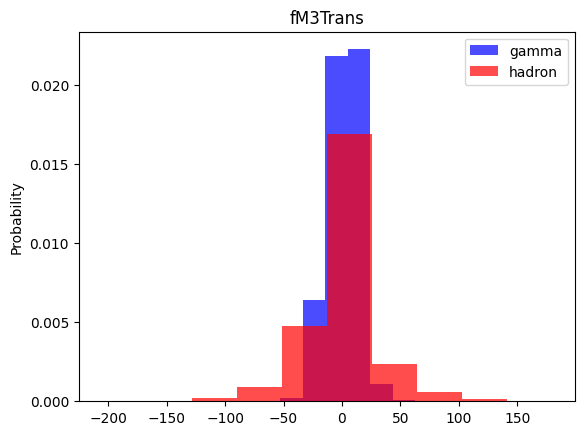

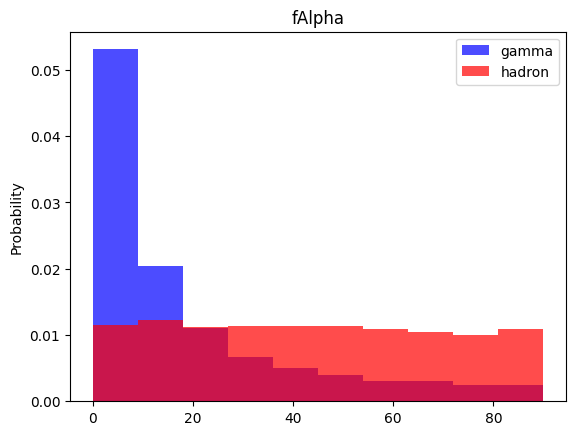

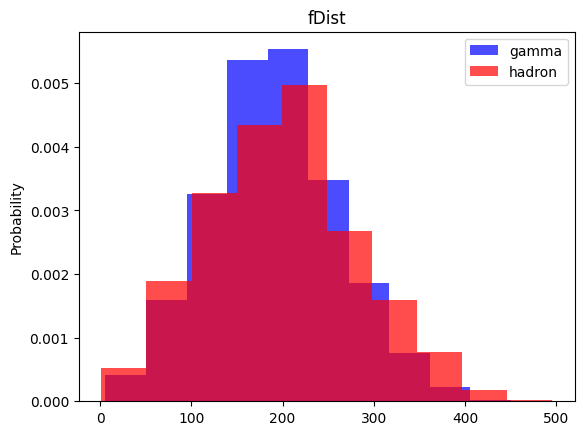

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color="blue", label='gamma', alpha =0.7, density=True)
  plt.hist(df[df["class"]==0][label], color="red", label='hadron', alpha =0.7, density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.legend()
  plt.show()

#Train, Validation, Test dataset

In [ ]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:

def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
print(len(train[train["class"] == 1]))
print(len(train[train["class"] == 0]))


7403
4009


In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)


# KNN

In [ ]:

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1313
           1       0.86      0.88      0.87      2491

    accuracy                           0.83      3804
   macro avg       0.81      0.81      0.81      3804
weighted avg       0.83      0.83      0.83      3804



#Naive Bays

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.42      0.52      1313
           1       0.75      0.91      0.82      2491

    accuracy                           0.74      3804
   macro avg       0.72      0.66      0.67      3804
weighted avg       0.73      0.74      0.72      3804



#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.72      0.70      1313
           1       0.85      0.81      0.83      2491

    accuracy                           0.78      3804
   macro avg       0.76      0.77      0.76      3804
weighted avg       0.79      0.78      0.78      3804



#SVM(Support vector machines)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC()
svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred = svm.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1313
           1       0.90      0.90      0.90      2491

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



#Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
nn = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu',input_shape=(10,)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

nn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = nn.fit(
    X_train,
    y_train,
    epochs=100,
    batch_size=32,
    validation_split = 0.2
    )


Epoch 1/100
371/371 [==============================] - 2s 2ms/step - loss: 0.5607 - accuracy: 0.7172 - val_loss: 0.6695 - val_accuracy: 0.5804
Epoch 2/100
371/371 [==============================] - 1s 2ms/step - loss: 0.4711 - accuracy: 0.7797 - val_loss: 0.5849 - val_accuracy: 0.6735
Epoch 3/100
371/371 [==============================] - 1s 2ms/step - loss: 0.4524 - accuracy: 0.7943 - val_loss: 0.6387 - val_accuracy: 0.6415
Epoch 4/100
371/371 [==============================] - 1s 2ms/step - loss: 0.4430 - accuracy: 0.8017 - val_loss: 0.6350 - val_accuracy: 0.6533
Epoch 5/100
371/371 [==============================] - 1s 2ms/step - loss: 0.4272 - accuracy: 0.8139 - val_loss: 0.5915 - val_accuracy: 0.6877
Epoch 6/100
371/371 [==============================] - 1s 2ms/step - loss: 0.4160 - accuracy: 0.8202 - val_loss: 0.5536 - val_accuracy: 0.7164
Epoch 7/100
371/371 [==============================] - 1s 1ms/step - loss: 0.4143 - accuracy: 0.8227 - val_loss: 0.5961 - val_accuracy: 0.6891

F1 Score: 0.9051012753188297


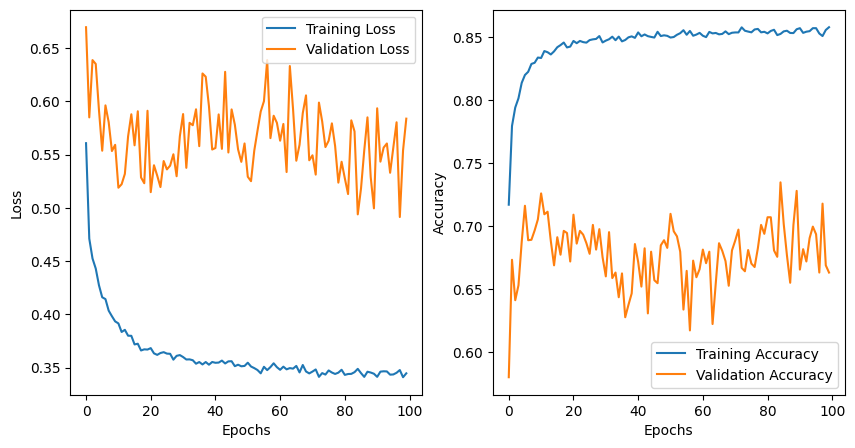

In [ ]:
# Plot training and validation loss
from sklearn.metrics import f1_score

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Calculate F1 score on the test set
y_pred_binary = np.where(y_pred > threshold, 1, 0)
f1 = f1_score(y_test, y_pred_binary)

# Print the F1 score
print("F1 Score:", f1)

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
